# Histórico de Conflitos de Terra de Cidades Fronteiriças do Brasil
## Análise de Dados Exploratória

---

#### Instalar módulos

In [ ]:
# !pip install openpyxl
# !pip install plotly

#### Importar módulos

In [2]:
import pandas as pd
import seaborn as sns; sns.set()

#### Recarregar histórico de conflitos finalizado

In [3]:
history = pd.read_excel('Resultados/histórico-conflitos-atualizado.xlsx')

---
## Conflitos de terra em cidades de fronteira

Contagems e proporções territoriais para o período de 2000 à 2021

### Pré-processamento

#### Formatar campo de identidade do município

In [4]:
history['ID'] = history['MUN'] + ' - ' + history['UF']

#### Calcular total de conflitos por cidade

In [20]:
display('CONF2000	CONF2001	CONF2002	CONF2003	CONF2004	CONF2005	...	CONF2012	CONF2013	CONF2014	CONF2015	CONF2016	CONF2017	CONF2018	CONF2019	CONF2020	CONF2021'.split('\t'))

['CONF2000',
 'CONF2001',
 'CONF2002',
 'CONF2003',
 'CONF2004',
 'CONF2005',
 '...',
 'CONF2012',
 'CONF2013',
 'CONF2014',
 'CONF2015',
 'CONF2016',
 'CONF2017',
 'CONF2018',
 'CONF2019',
 'CONF2020',
 'CONF2021']

In [24]:
# Listar colunas com contagems por ano
year_columns = ['CONF2000', 'CONF2001', 'CONF2002', 'CONF2003', 'CONF2004', 'CONF2005', 'CONF2006', 'CONF2007', 'CONF2008', 'CONF2009', 'CONF2010', 'CONF2011', 'CONF2012', 'CONF2013', 'CONF2014', 'CONF2015', 'CONF2016', 'CONF2017', 'CONF2018', 'CONF2019', 'CONF2020', 'CONF2021']

# Somar colunas com contagems por ano
history['TOTAL'] = history[year_columns].sum(axis=1)
history['TOTAL_2000_2010'] = history[year_columns[:11]].sum(axis=1)
history['TOTAL_2011_2021'] = history[year_columns[11:]].sum(axis=1)


#### Criar coluna para o arco regional ao qual o estado do município pertence

In [25]:
# Mapeamento de arcos por estado
arcos = {
    'RS': "SUL",
    'SC': "SUL",
    'PR': "SUL",
    'MS': "CENTRO",
    'MT': "CENTRO",
    'PR': "CENTRO",
    'AC': 'NORTE',
    'RO': 'NORTE',
    'RR': 'NORTE',
    'PA': 'NORTE',
    'AP': 'NORTE',
    'AM': 'NORTE',
}

# Criar coluna de `arco` ao qual o município pertence
history['ARCO'] = history['UF'].map(arcos)

#### Exibir dados processados

In [26]:
print('Columns:', history.columns.tolist(), end='\n\n')
display(history.head())

Columns: ['id', 'CUGN', 'CUGT', 'MUN', 'UF', 'ARCO', 'FF', 'FFSITGEO', 'FRONTEIRA', 'MAPA_DE_CONFLITOS', 'TOTAL_2000_2010', 'TOTAL_2011_2021', 'TOTAL_2000_2011', 'TOTAL_2012_2021', 'TOTAL', 'RECORRENCIA_15', 'RECORRENCIA_10', 'RECORRENCIA_5', 'RECORRENCIA_1', 'CONF2000', 'CONF2001', 'CONF2002', 'CONF2003', 'CONF2004', 'CONF2005', 'CONF2006', 'CONF2007', 'CONF2008', 'CONF2009', 'CONF2010', 'CONF2011', 'CONF2012', 'CONF2013', 'CONF2014', 'CONF2015', 'CONF2016', 'CONF2017', 'CONF2018', 'CONF2019', 'CONF2020', 'CONF2021', 'ID']



,id,CUGN,CUGT,MUN,UF,ARCO,FF,FFSITGEO,FRONTEIRA,MAPA_DE_CONFLITOS,...,CONF2013,CONF2014,CONF2015,CONF2016,CONF2017,CONF2018,CONF2019,CONF2020,CONF2021,ID
0,alta floresta d'oeste - ro,1100015,1100015,Alta Floresta D'Oeste,RO,NORTE,1,2,1,3,...,0,1,2,4,3,1,1,8,1,Alta Floresta D'Oeste - RO
1,ariquemes - ro,1100023,1100023,Ariquemes,RO,NORTE,0,0,0,1,...,0,3,1,0,0,1,0,1,1,Ariquemes - RO
2,cabixi - ro,1100031,1100031,Cabixi,RO,NORTE,1,2,1,0,...,0,0,0,2,1,0,0,0,0,Cabixi - RO
3,cerejeiras - ro,1100056,1100056,Cerejeiras,RO,NORTE,1,3,0,0,...,0,1,0,1,0,0,1,0,0,Cerejeiras - RO
4,corumbiara - ro,1100072,1100072,Corumbiara,RO,NORTE,1,3,0,0,...,0,2,0,0,0,0,0,1,0,Corumbiara - RO


### Análise exploratória

#### Contagem total por cidade (Top 10)

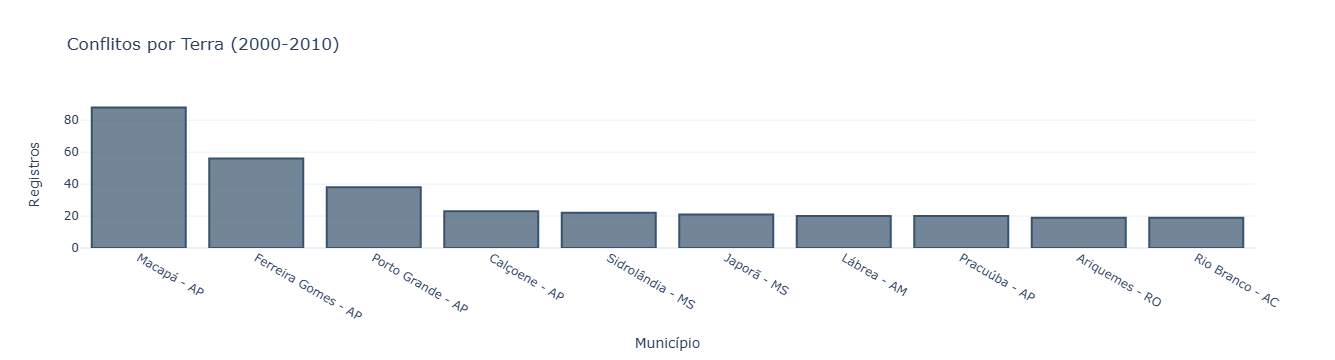

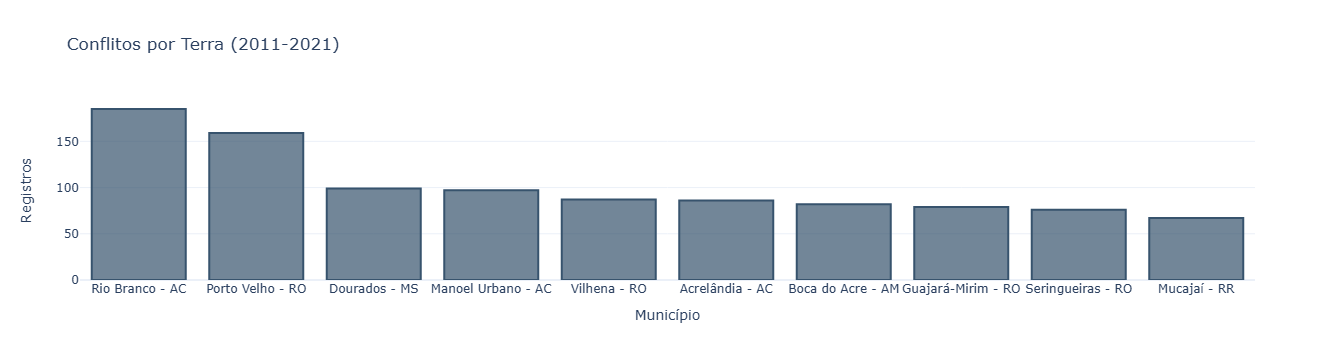

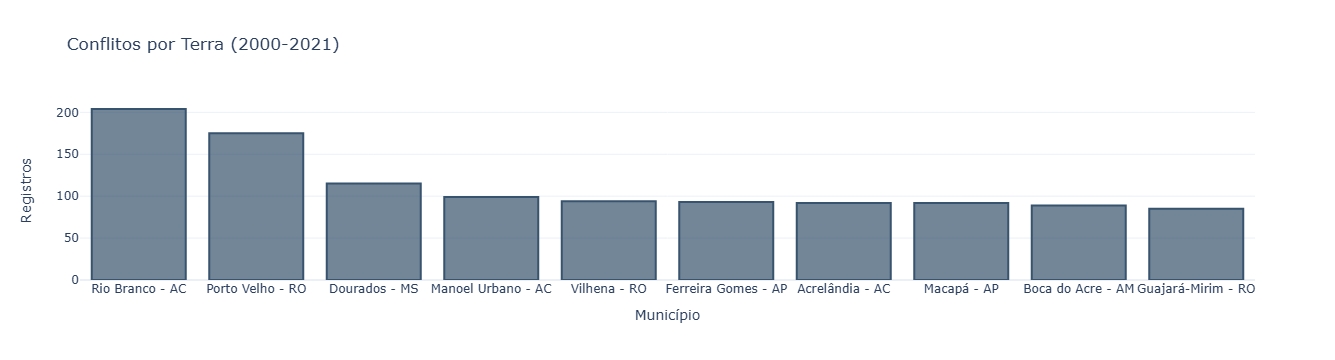

In [27]:
from Modulos.visu import bar_chart

plot = lambda data, title: bar_chart(
    data,
    marker=dict(color='rgba(55, 83, 109, 0.7)', line=dict(color='rgba(55, 83, 109, 1.0)', width=2)),
    title=title,
    xaxis_title="Município",
    yaxis_title="Registros",
    template='plotly_white',
    width=500,
    height=300        
)

data = history.set_index('ID')['TOTAL_2000_2010'].nlargest(10)
plot(data, "Conflitos por Terra (2000-2010)")

data = history.set_index('ID')['TOTAL_2011_2021'].nlargest(10)
plot(data, "Conflitos por Terra (2011-2021)")

data = history.set_index('ID')['TOTAL'].nlargest(10)
plot(data, "Conflitos por Terra (2000-2021)")

#### Contagem total por estado

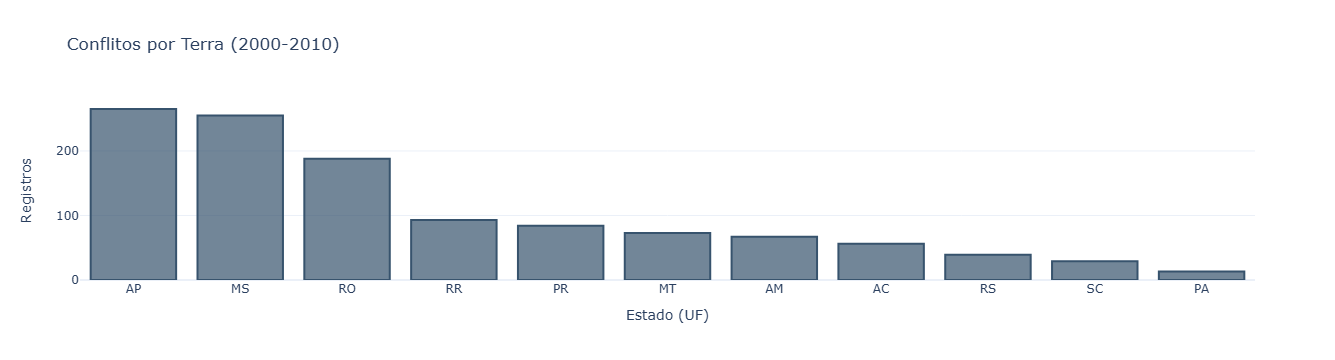

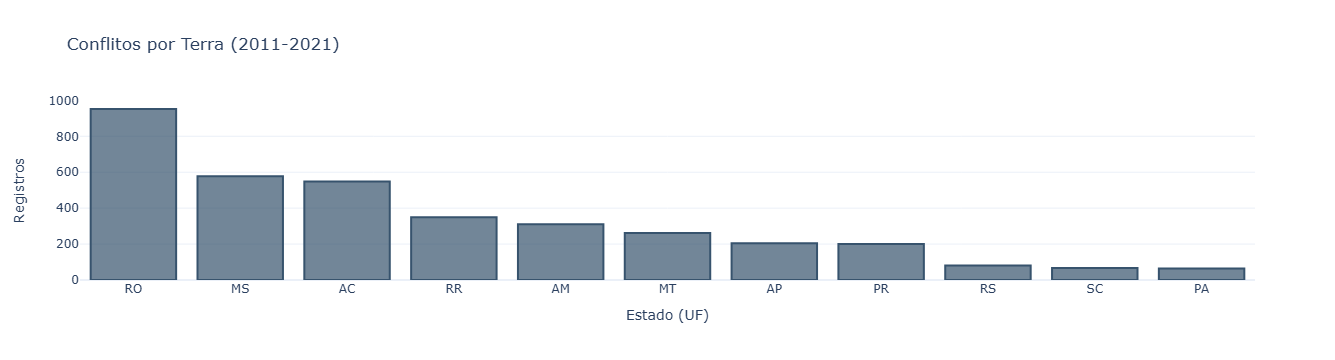

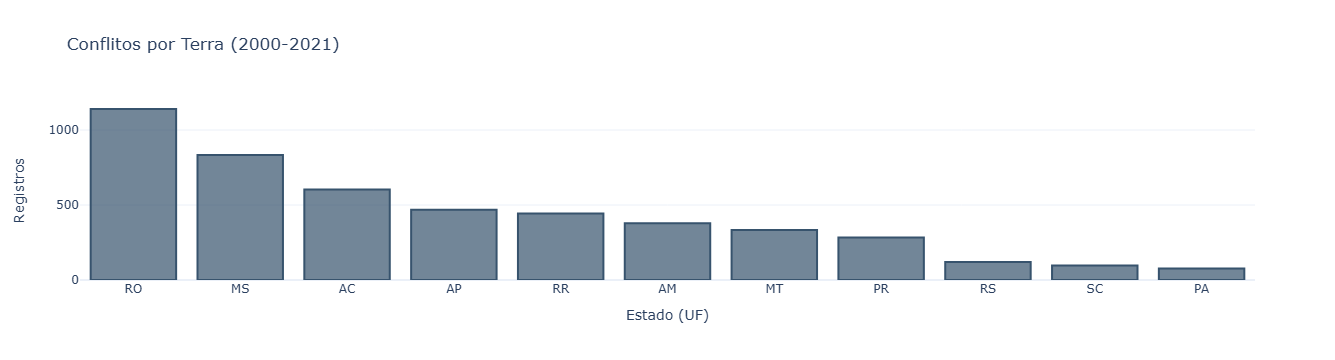

In [28]:
from Modulos.visu import bar_chart

plot = lambda data, title: bar_chart(
    data,
    marker=dict(color='rgba(55, 83, 109, 0.7)', line=dict(color='rgba(55, 83, 109, 1.0)', width=2)),
    title=title,
    xaxis_title="Estado (UF)",
    yaxis_title="Registros",
    template='plotly_white',
    width=500,
    height=300        
)

uf_count = history.groupby('UF')['TOTAL_2000_2010'].sum()
data = uf_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2010)")

uf_count = history.groupby('UF')['TOTAL_2011_2021'].sum()
data = uf_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2011-2021)")

uf_count = history.groupby('UF')['TOTAL'].sum()
data = uf_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2021)")

#### Proporção por estado (UF)

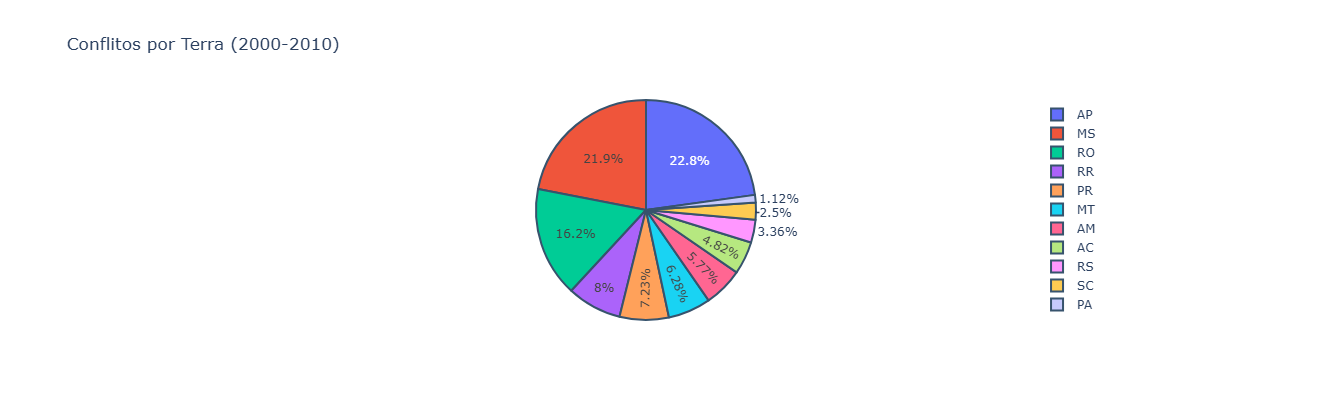

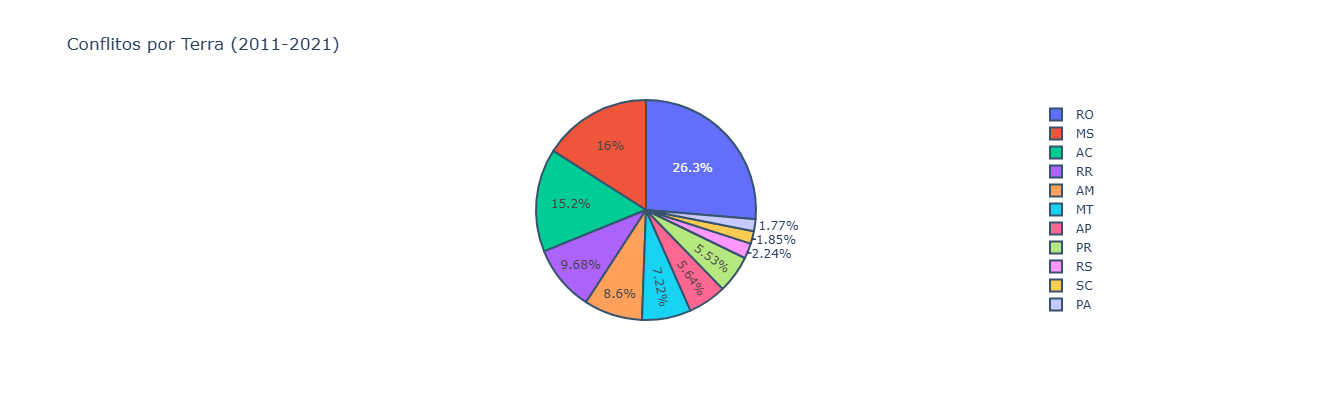

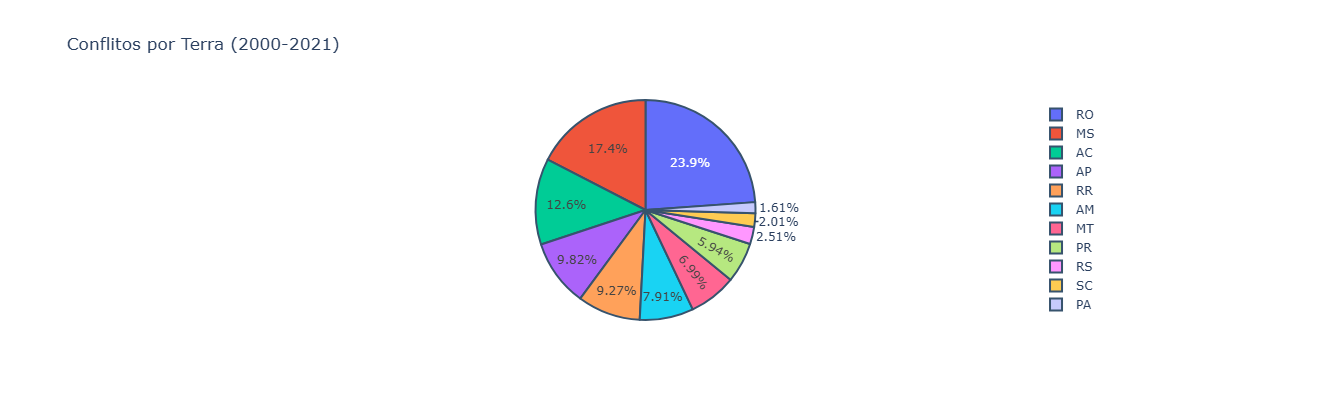

In [29]:
from Modulos.visu import pie_chart

plot = lambda data, title: pie_chart(
    data,
    hoverinfo='label+percent',
    textinfo='percent',
    marker=dict(line=dict(color='rgba(55, 83, 109, 1.0)', width=2)),
    title=title,
    template='plotly_white',
    width=600,
    height=400
)

uf_count = history.groupby('UF')['TOTAL_2000_2010'].sum()
data = uf_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2010)")

uf_count = history.groupby('UF')['TOTAL_2011_2021'].sum()
data = uf_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2011-2021)")

uf_count = history.groupby('UF')['TOTAL'].sum()
data = uf_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2021)")

#### Contagem total por arco regional

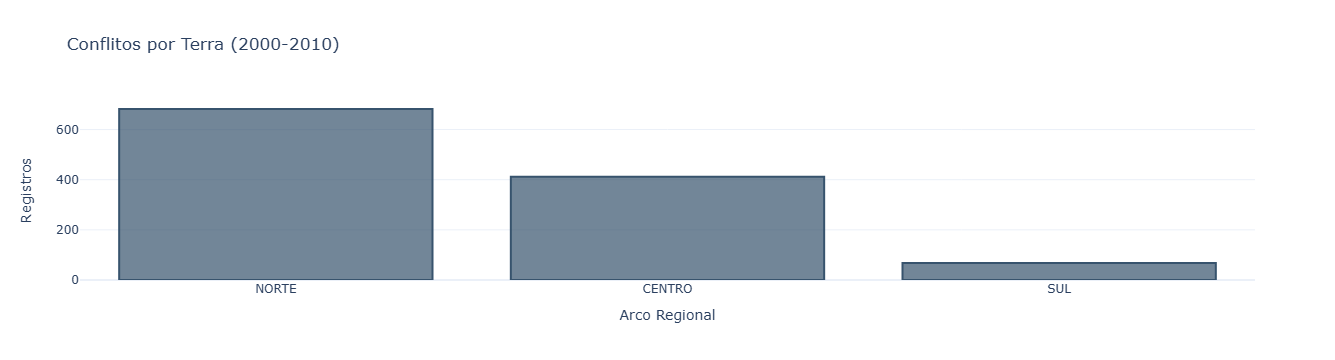

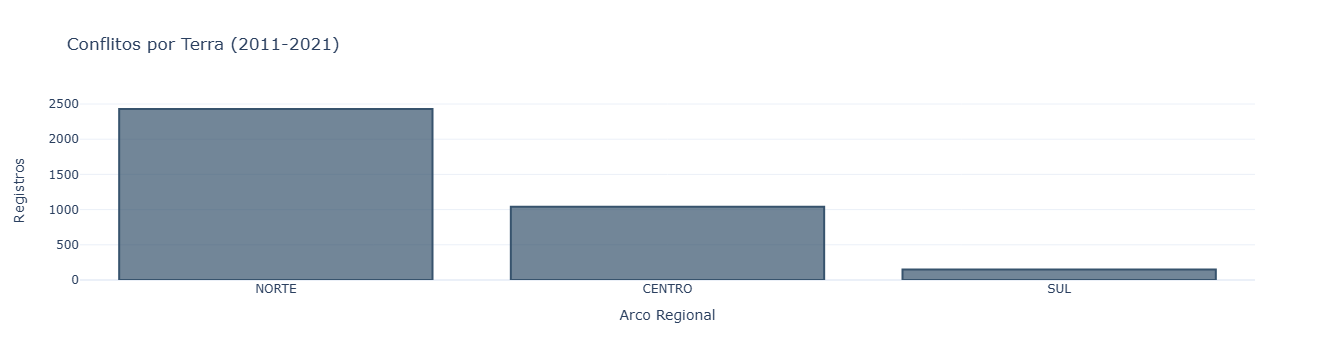

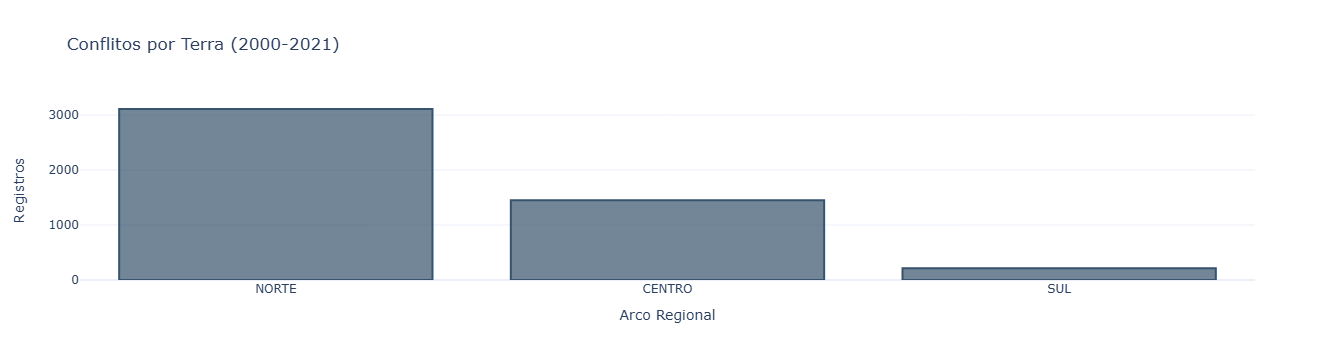

In [30]:
from Modulos.visu import bar_chart

plot = lambda data, title: bar_chart(
    data,
    marker=dict(color='rgba(55, 83, 109, 0.7)', line=dict(color='rgba(55, 83, 109, 1.0)', width=2)),
    title=title,
    xaxis_title="Arco Regional",
    yaxis_title="Registros",
    template='plotly_white',
    width=500,
    height=300        
)

data = history.groupby('ARCO')['TOTAL_2000_2010'].sum().sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2010)")

data = history.groupby('ARCO')['TOTAL_2011_2021'].sum().sort_values(ascending=False)
plot(data, "Conflitos por Terra (2011-2021)")

data = history.groupby('ARCO')['TOTAL'].sum().sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2021)")

#### Proporção por arco regional

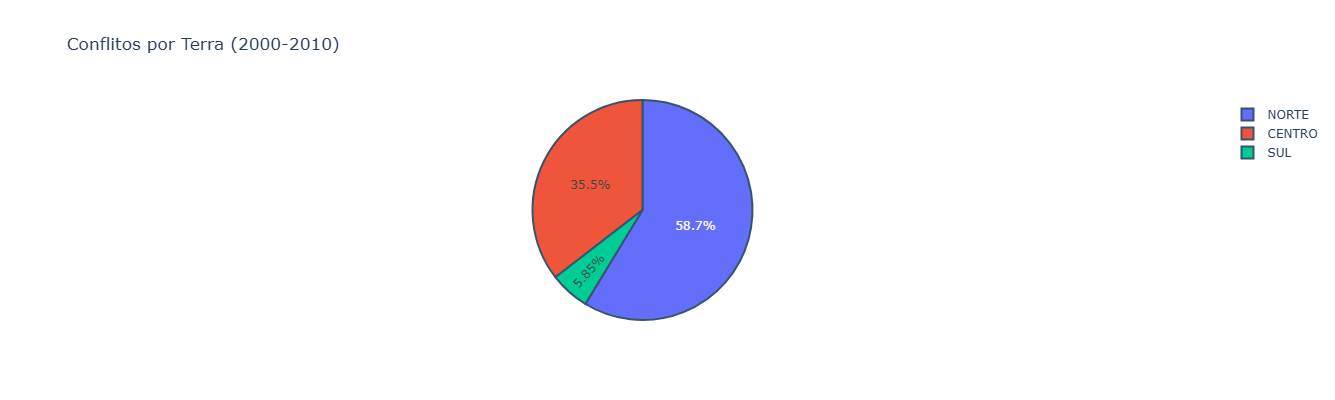

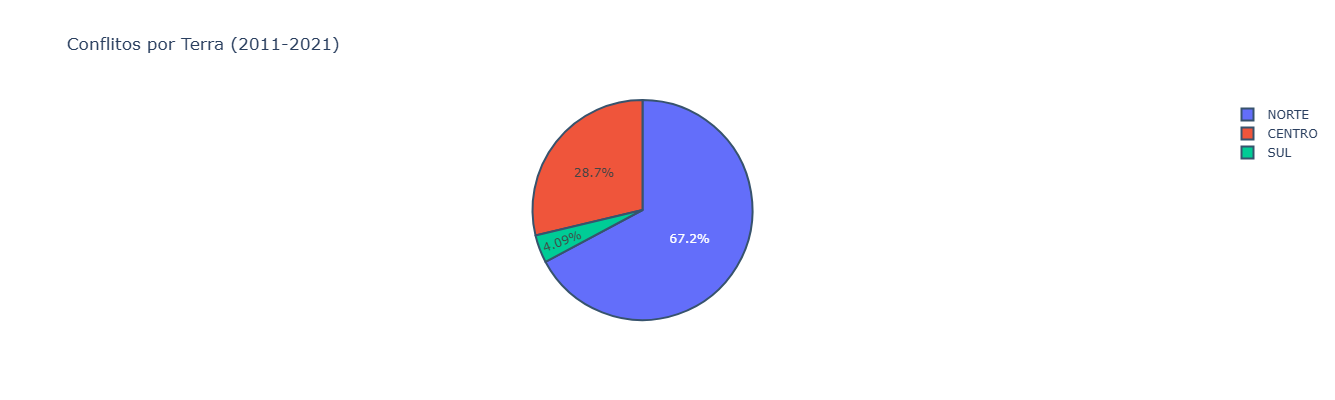

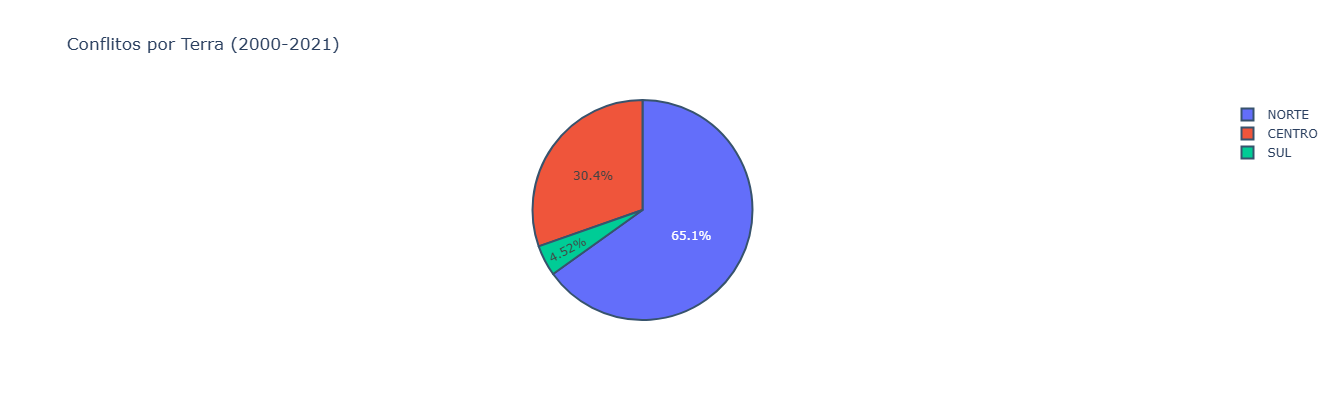

In [31]:
from Modulos.visu import pie_chart

plot = lambda data, title: pie_chart(
    data,
    hoverinfo='label+percent',
    textinfo='percent',
    marker=dict(line=dict(color='rgba(55, 83, 109, 1.0)', width=2)),
    title=title,
    template='plotly_white',
    width=600,
    height=400
)

arco_count = history.groupby('ARCO')['TOTAL_2000_2010'].sum()
data = arco_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2010)")

arco_count = history.groupby('ARCO')['TOTAL_2011_2021'].sum()
data = arco_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2011-2021)")

arco_count = history.groupby('ARCO')['TOTAL'].sum()
data = arco_count.sort_values(ascending=False)
plot(data, "Conflitos por Terra (2000-2021)")

---
## Conflitos de injustiça ambiental e saúde

### Análise exploratória

#### Contagem por cidade

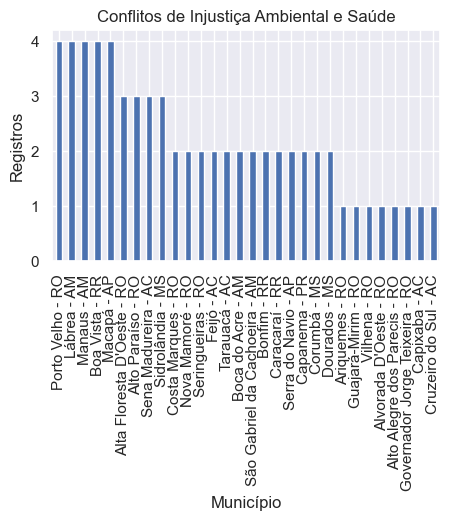

In [82]:
# Conflitos de Injustiça Ambiental e Saúde por cidade
mapa_count = history.set_index('ID')['MAPA DE CONFLITOS']

# Top 10 cidades com mais conflitos
ax = mapa_count.nlargest(30).plot.bar(
    title="Conflitos de Injustiça Ambiental e Saúde",
    xlabel="Município",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Contagem por Estado

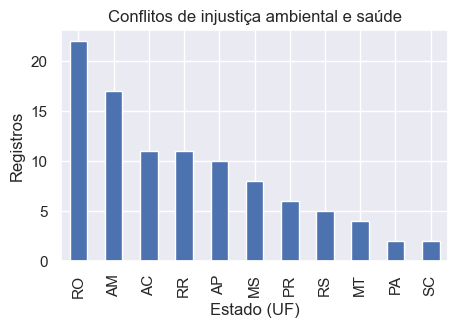

In [84]:
# Conflitos de injustiça ambiental e saúde por estado (UF)
mapa_count = history.groupby('UF')['MAPA DE CONFLITOS'].sum()

# Contagem de conflitos por estado 
ax = mapa_count.sort_values(ascending=False).plot.bar(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Estado (UF)",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Proporção por estado (UF)

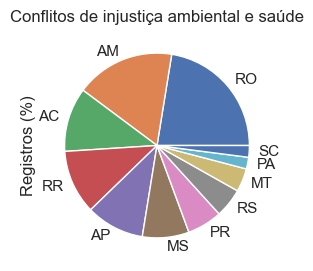

In [88]:
# Proporção de conflitos de injustiça ambiental e saúde por estado (UF)
ax = mapa_count.sort_values(ascending=False).plot.pie(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Estado",
    ylabel="Registros (%)",
    figsize=(5, 3),
)

#### Contagem por arco regional

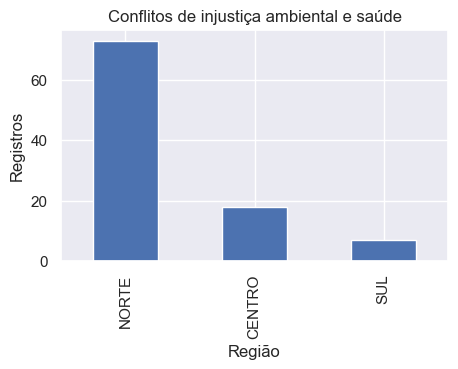

In [90]:
# Conflitos de injustiça ambiental e saúde por estado (UF)
arco_count = history.groupby('ARCO')['MAPA DE CONFLITOS'].sum()

# Contagem de conflitos de injustiça ambiental e saúde por arco regional
ax = arco_count.sort_values(ascending=False).plot.bar(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Região",
    ylabel="Registros",
    figsize=(5, 3),
)

#### Proporção por arco regional

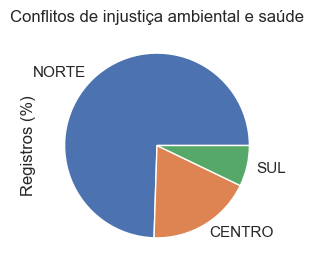

In [91]:
# Proporção de conflitos de injustiça ambiental e saúde por arco regional
ax = arco_count.sort_values(ascending=False).plot.pie(
    title="Conflitos de injustiça ambiental e saúde",
    xlabel="Região",
    ylabel="Registros (%)",
    figsize=(5, 3),
)